dataset - https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [ ]:
# Each row represents a different case or instance where advertising spending was allocated to TV, Radio, and Newspaper, and the resulting sales
# figures are recorded. For example, the first row indicates that $230.1 was spent on TV advertising, $37.8 on Radio advertising, $69.2 on Newspaper 
# advertising, and it resulted in sales of 22.1 units. Similarly, the second row indicates $44.5 spent on TV advertising, $39.3 on Radio advertising, 
# $45.1 on Newspaper advertising, resulting in 10.4 units of sales, and so on for the other rows.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('C:\\Users\\User\\Downloads\\soumya\\advertising.csv')

In [4]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.shape

(200, 4)

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


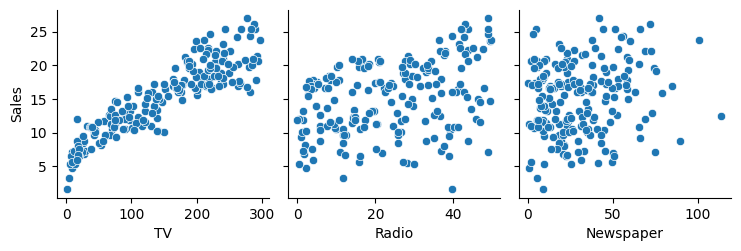

In [15]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'], y_vars='Sales', data=data)

When advertising cost for TV is increasing the sales units is also increasing respectively. While Newspaper and Radio is much un predictable

Text(0.5, 0, 'Units')

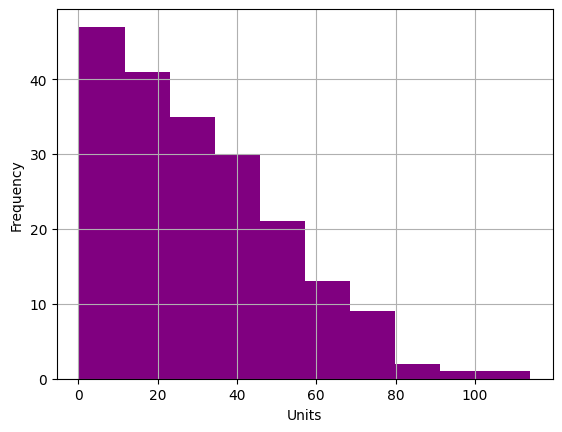

In [27]:
data['Newspaper'].hist(color='purple',bins=10)
plt.ylabel("Frequency")
plt.xlabel("Units")

Text(0.5, 0, 'Units')

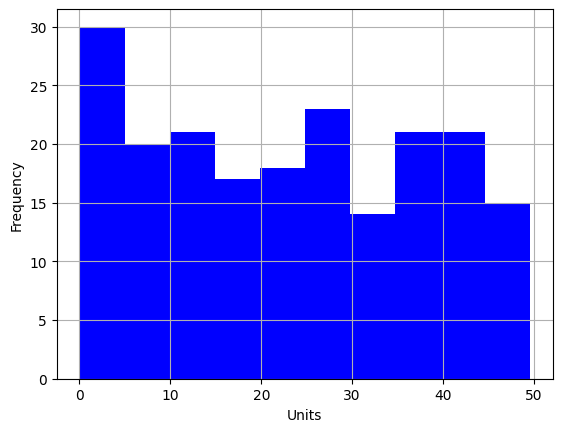

In [29]:
data['Radio'].hist(color='blue',bins=10)
plt.ylabel("Frequency")
plt.xlabel("Units")

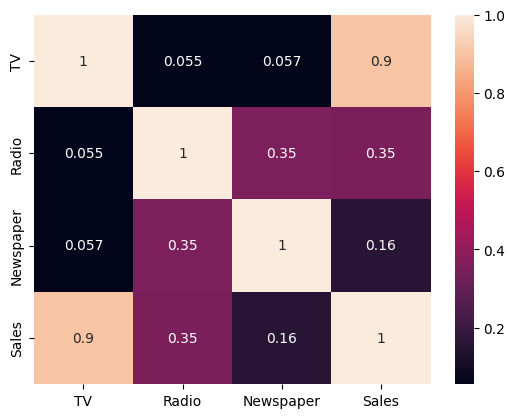

In [30]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x=data[['TV','Radio','Newspaper']]
y=data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(x_train,y_train)

LinearRegression()

In [43]:
pred=mod.predict(x_test)
print(pred.round(2))

[17.03 20.41 23.72  9.27 21.68 12.57 21.08  8.69 17.24 16.67  8.92  8.48
 18.21  8.07 12.65 14.93  8.13 17.9  11.01 20.48 20.81 12.6  10.91 22.39
  9.42  7.93 20.84 13.82 10.77  7.93 15.96 10.63 20.8  10.43 21.58 21.18
 12.13 22.81 12.61  6.46]


In [45]:
y_test.values

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1, 11. ,
        8.7, 16.9,  5.3, 10.3, 16.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2, 11.3,  8.1, 21.7, 13.4, 10.6,  5.7, 15.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

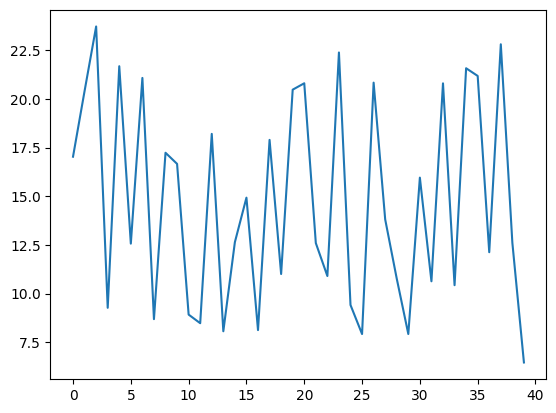

In [48]:
plt.plot(pred)

In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5
print("Root Mean Squared Error on Training Data:", rmse)

Root Mean Squared Error on Training Data: 1.7052146229349228
